### Main file

In [1]:
import numpy as np 
from tools.srbm import *           # !!! Importing the experimental SRBM model !!!
from tools.functions import *
import matplotlib.pyplot as plt

date_str = str(datetime.datetime.now())[0:10]
date_time_str = str(datetime.datetime.now())[0:10]+"_"+str(datetime.datetime.now())[11:16]

/opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
'''Load data that has been generated with "generate_data.py".
The file will be named according to the following pattern:  
data + number of classes + variation in prototype + variation in prototype replications + length stimuli + n datapoints
parameters in "common_parameters.py" need to be adjusted to fit the data. 
'''

# Loading the data
train_test_sequence_data = load_data(unique="finnegan_0.1_0.05_5_200_1000")

Data loaded from data/data_finnegan_0.1_0.05_5_200_1000.npy


In [3]:
# Preparing the data
sequence_data = get_data(n_samples=n_samples, min_p = .00001, max_p = .98, binary = True, seed=0, 
                           load_from_drive=False, data=train_test_sequence_data, num_classes = range(n_classes))

In [4]:
# Create input current from data
Id = create_Id(N_v=N_v, N_c=N_c, n_c_unit=n_c_unit, beta=beta_parameter, n_samples=n_samples, data = sequence_data)

# Create the parameters for the SRBM
W, b_v, b_c, b_h = create_rbm_parameters(N_v = N_v, N_c = N_c, N_h = N_h)

In [5]:
# Run the model
loc = main(W, b_v, b_c, b_h, Id = Id, dorun = True, monitors = True, mnist_data=sequence_data, n_classes = 5)
locals().update(loc)

WARNING    Removing unsupported flag '-march=native' from compiler flags. [brian2.codegen.cpp_prefs]


Train accuracy: 0.22
Test accuracy: 0.205
Train accuracy: 0.225
Test accuracy: 0.205
Train accuracy: 0.22
Test accuracy: 0.205
Train accuracy: 0.33
Test accuracy: 0.405
Train accuracy: 0.33
Test accuracy: 0.385
Train accuracy: 0.22
Test accuracy: 0.205
Train accuracy: 0.26
Test accuracy: 0.305
Train accuracy: 0.325
Test accuracy: 0.39
Train accuracy: 0.675
Test accuracy: 0.675
Train accuracy: 0.6
Test accuracy: 0.635
Train accuracy: 0.375
Test accuracy: 0.445
Train accuracy: 0.37
Test accuracy: 0.45
Train accuracy: 0.345
Test accuracy: 0.39
Train accuracy: 0.59
Test accuracy: 0.62
Train accuracy: 0.595
Test accuracy: 0.64
Train accuracy: 0.595
Test accuracy: 0.64
Train accuracy: 0.595
Test accuracy: 0.64
Train accuracy: 0.595
Test accuracy: 0.64
Train accuracy: 0.68
Test accuracy: 0.7
Train accuracy: 0.715
Test accuracy: 0.72
Train accuracy: 0.895
Test accuracy: 0.895
Train accuracy: 0.975
Test accuracy: 0.995
Train accuracy: 0.98
Test accuracy: 0.99
Train accuracy: 0.98
Test accuracy:

In [6]:
neuron_group_rhidden.age

<neurongroup_1.age: array([ 0.99472104, -0.48711275, -0.86163804,  0.41583895, -0.49669942,
        0.60923289,  0.83272094, -0.52987355, -0.8508756 , -0.63582032,
       -0.65636496, -0.04221402, -0.70611919, -0.95737201, -0.2004149 ,
        0.85576656,  0.22600229, -0.26105774, -0.41687567, -0.66311608,
        0.22278708, -0.90521457, -0.80493339,  0.21002784, -0.64017907,
        0.76383064,  0.33524941, -0.23603519,  0.36581348, -0.1176229 ,
        0.71196915, -0.0267689 , -0.65424386, -0.815922  , -0.34311444,
       -0.14506839,  0.07524462,  0.20447719, -0.21017246,  0.7633633 ,
       -0.40676845, -0.48888077,  0.67766338, -0.78318322, -0.65668388,
       -0.69863067,  0.47527388, -0.85796926, -0.35093989,  0.34658654])>

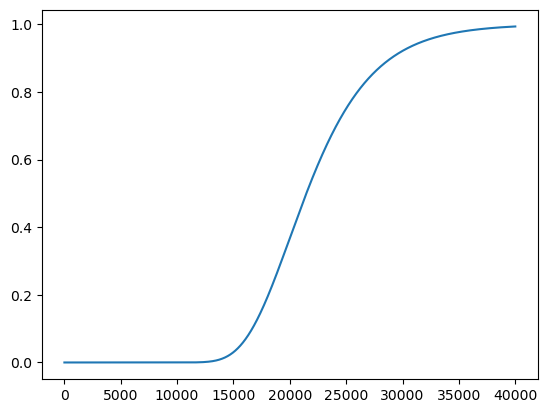

In [7]:
plot(growth_factor_list)
plt.show()


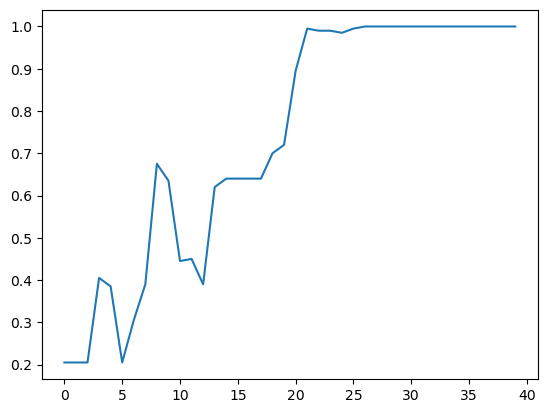

In [8]:
plot(res_hist_test)
plt.show()

In [9]:
# Prepare weights and biases

W = np.array(Srs.w).reshape(N_v+N_c, N_h)*beta_parameter
Wvh=W[:N_v,:]
Wch=W[N_v:,:]
mBv = np.array(Sbv.w)*beta_parameter*tau_rec*bias_input_rate
mBh = np.array(Sbh.w)*beta_parameter*tau_rec*bias_input_rate
b_c = mBv[N_v:(N_v+N_c)]
b_v = mBv[:N_v]
b_h = mBh
mB = np.concatenate([mBv,mBh])

Reconstruct

In [10]:
Ids = np.column_stack([
    create_single_Id(0, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 1.0) * 0,
    create_single_Id(0, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 1.0) * 0 ,
    create_single_Id(1, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 1.0),
    create_single_Id(2, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 1.0, mult_data = 0.0) * 0,
    create_single_Id(3, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 1.0) * 0,
    create_single_Id(4, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 1.0 ) * 0
    ]).T

In [11]:
t_ref = 0.004 * second
dcmt = 35
T = dcmt*t_ref
init_delay=dcmt*t_ref
delay=0*ms

In [12]:
def create_Id_pattern(n, data, N_v, N_c, n_c_unit, beta_parameter, on_off_ratio, seed = 0, data_mult = 1, class_mult = 0, allowed_labels = None):
    np.random.seed(seed)
    Ids = [create_single_Id(0, data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 0.0)]
    labels_out = []
    if allowed_labels is None:
        labels = np.unique(data[1])
    else:
        labels = allowed_labels
    for i in range(n):
        label = np.random.choice(labels, 1)[0]
        Ids.append(create_single_Id(label, data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = class_mult, mult_data = data_mult))
        labels_out.append(label)
        for j in range(on_off_ratio):
            Ids.append(create_single_Id(0, data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 0.0))
            labels_out.append(label)
    return (np.column_stack(Ids).T, labels_out)

In [13]:
# Create the parameters for the SRBM
#W, b_v, b_c, b_h = create_rbm_parameters(N_v = N_v, N_c = N_c, N_h = N_h)

In [22]:
n_patterns = 5
on_off_ratio = 0
Ids, labels = create_Id_pattern(n_patterns, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, beta_parameter = beta_parameter, 
                        on_off_ratio = on_off_ratio, seed = 14, data_mult = 1, class_mult = 0, allowed_labels = [0, 1, 2, 3, 4])
print(Ids.shape)
print(labels[::3])

(6, 220)
[3, 1]


In [23]:
timepoints, t_sim, time_points_dict = create_timepoints(Ids, init_delay, delay, T)

In [24]:
out = main(W, b_v, b_c, b_h, t_sim = t_sim, Id = Ids, monitors = True, dorun = True, mnist_data=sequence_data, n_classes = 5)
Mh, Mv, Mc= out['Mh'], out['Mv'], out['Mc']

Train accuracy: 1.0
Test accuracy: 1.0
0.7603130340576172


In [25]:
# Save the weights and biases
#save_matrices(W, Wvh, Wch, mBv, mBh, b_c, b_v, b_h, mB, date_str, date_time_str)

In [26]:
from brian2tools import *

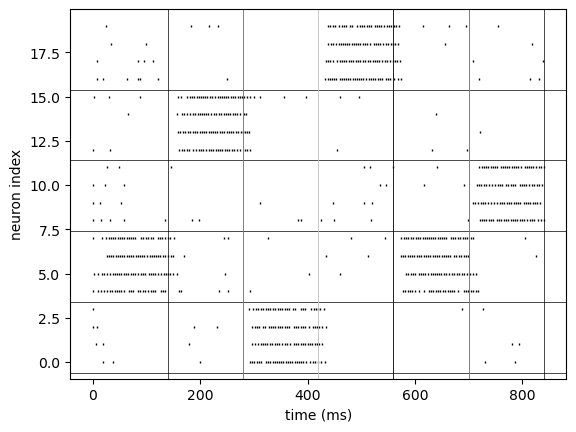

In [27]:
plot_raster(Mc.i, Mc.t, markersize=2, marker='|', color='k', mew=1)
for i in range(n_classes):
    axhline(-0.6+float(i)*4, color='k', linewidth=0.5)
color_list = ['k', '#FFFFFF', "r"]
col_cnt = 0
for i in timepoints:
    axvline(i/second*1000, color=color_list[col_cnt%len(color_list)], linewidth=0.5)
    col_cnt += 1

In [28]:
frequency_classification(Mc, n_classes, n_c_unit, t_ref=t_ref, t_start=time_points_dict["T1_s"], t_end=time_points_dict["T1_e"]*second, delay = 10)

p-value: 0.03. Confidence: High


3

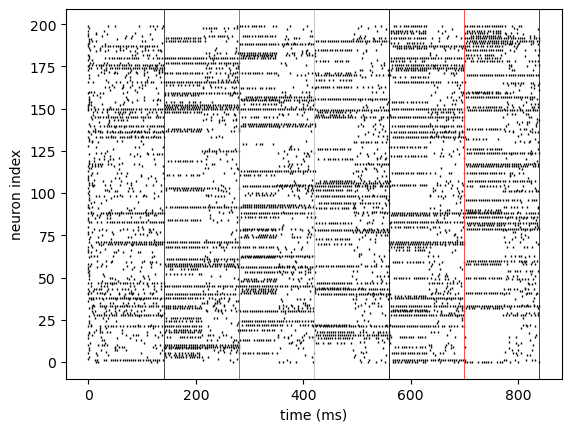

In [29]:
plot_raster(Mv.i, Mv.t, markersize=2,marker='|', color='k', mew=1)
col_cnt = 0
for i in timepoints:
    axvline(i/second*1000, color=color_list[col_cnt%len(color_list)], linewidth=0.5)
    col_cnt += 1